In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Creating a synthetic dataset
data = {
'Square_Feet': [0, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1200, 1300],
'Bedrooms': [0,2, 2, 3, 3, 3, 4, 4, 4, 5, 5],
'Bathrooms': [0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4],
'Proximity_to_City_Center': [0, 5, 6, 4, 7, 3, 8, 2, 10, 1, 15],
'Age_of_House': [0, 10, 20, 5, 15, 3, 25, 2, 30, 1, 50],
'Price': [0, 150000, 160000, 175000, 185000, 195000, 210000, 220000, 230000, 250000, 270000]
}

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

# Display first few rows
print(df)

    Square_Feet  Bedrooms  Bathrooms  Proximity_to_City_Center  Age_of_House  \
0             0         0          0                         0             0   
1           750         2          1                         5            10   
2           800         2          1                         6            20   
3           850         3          2                         4             5   
4           900         3          2                         7            15   
5           950         3          2                         3             3   
6          1000         4          3                         8            25   
7          1050         4          3                         2             2   
8          1100         4          3                        10            30   
9          1200         5          4                         1             1   
10         1300         5          4                        15            50   

     Price  
0        0  
1   150000  


In [4]:
# Checking for missing values
print(df.isnull().sum())
print(df.describe())

Square_Feet                 0
Bedrooms                    0
Bathrooms                   0
Proximity_to_City_Center    0
Age_of_House                0
Price                       0
dtype: int64
       Square_Feet   Bedrooms  Bathrooms  Proximity_to_City_Center  \
count    11.000000  11.000000  11.000000                 11.000000   
mean    900.000000   3.181818   2.272727                  5.545455   
std     342.052628   1.470930   1.272078                  4.367233   
min       0.000000   0.000000   0.000000                  0.000000   
25%     825.000000   2.500000   1.500000                  2.500000   
50%     950.000000   3.000000   2.000000                  5.000000   
75%    1075.000000   4.000000   3.000000                  7.500000   
max    1300.000000   5.000000   4.000000                 15.000000   

       Age_of_House          Price  
count     11.000000      11.000000  
mean      14.636364  185909.090909  
std       15.596620   71826.811910  
min        0.000000       0.

In [5]:
# Features (independent variables)
X = df[['Square_Feet', 'Bedrooms', 'Bathrooms', 'Proximity_to_City_Center', 'Age_of_House']]

# Target Variable (dependent variable)
y = df['Price']

In [6]:
# Splitting dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (8, 5), Testing set: (3, 5)


In [7]:
# Initialize the Linear Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
# Print Intercept and Coefficients
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2, b3, ...):", model.coef_)

Intercept (b0): 1286.2310618095798
Coefficients (b1, b2, b3, ...): [ 187.81306451 3168.28323999 3168.28323999 -301.3487078    35.63534282]


In [8]:
# Predicting house prices using the test set
y_pred = model.predict(X_test)

# Compare Actual vs Predicted Prices
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_results)

   Actual      Predicted
5  195000  194752.918456
0       0    1286.231062
9  250000  254910.744274


In [9]:
import joblib

# Save Model and Scaler
joblib.dump(model, "multilinearreg_model.pkl")

['multilinearreg_model.pkl']

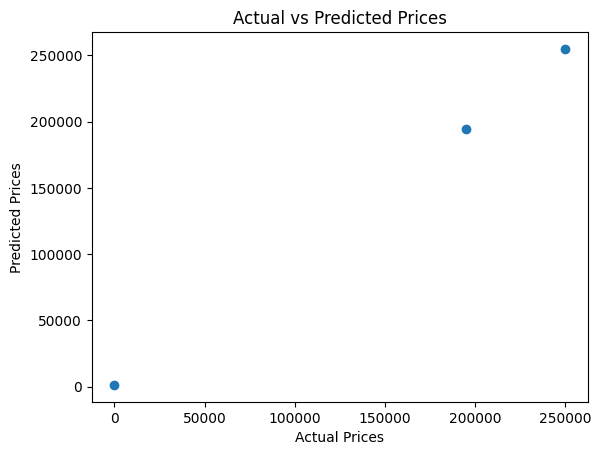

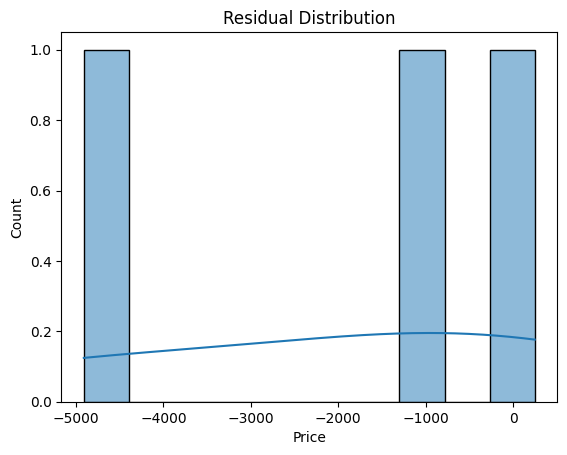

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# Residual Plot
residuals = y_test - y_pred
sns.histplot(residuals, bins=10, kde=True)
plt.title("Residual Distribution")
plt.show()